In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf   
import numpy as np

#### 1. 读取图片

In [6]:
image_raw_data = tf.gfile.FastGFile("../datasets/cat.jpg",'rb').read()

with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    
    # 输出解码之后的三维矩阵。
    print(img_data.eval())
    img_data.set_shape([1797, 2673, 3])
    print(img_data.get_shape())

[[[167 159 170]
  [167 159 170]
  [168 161 169]
  ..., 
  [135 135 137]
  [133 133 135]
  [131 131 133]]

 [[167 159 170]
  [167 159 170]
  [168 161 169]
  ..., 
  [134 134 136]
  [132 132 134]
  [130 130 132]]

 [[167 159 170]
  [168 160 171]
  [168 161 169]
  ..., 
  [134 134 136]
  [132 132 134]
  [130 130 132]]

 ..., 
 [[ 74  75  77]
  [ 75  76  78]
  [ 77  78  82]
  ..., 
  [109 111 108]
  [107 109 106]
  [106 108 105]]

 [[ 72  73  75]
  [ 73  74  76]
  [ 76  77  81]
  ..., 
  [109 111 108]
  [107 109 106]
  [106 108 105]]

 [[ 70  71  73]
  [ 72  73  75]
  [ 75  76  80]
  ..., 
  [109 111 108]
  [107 109 106]
  [106 108 105]]]
(1797, 2673, 3)


#### 2. 打印图片

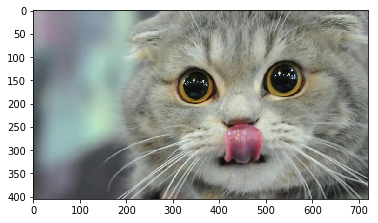

In [8]:
with tf.Session() as sess:
    plt.imshow(img_data.eval())
    plt.show()

#### 3. 重新调整图片大小

Digital type:  <dtype: 'float32'>


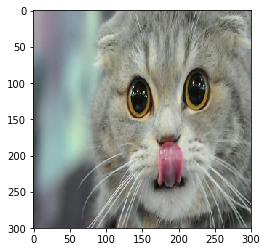

In [9]:
with tf.Session() as sess:    
    resized = tf.image.resize_images(img_data, [300, 300], method=0)
    
    # TensorFlow的函数处理图片后存储的数据是float32格式的，需要转换成uint8才能正确打印图片。
    print("Digital type: ", resized.dtype)
    cat = np.asarray(resized.eval(), dtype='uint8')
    # tf.image.convert_image_dtype(rgb_image, tf.float32)
    plt.imshow(cat)
    plt.show()

#### 4. 裁剪和填充图片

In [10]:
with tf.Session() as sess:    
    croped = tf.image.resize_image_with_crop_or_pad(img_data, 1000, 1000)
    padded = tf.image.resize_image_with_crop_or_pad(img_data, 3000, 3000)
    plt.imshow(croped.eval())
    plt.show()
    plt.imshow(padded.eval())
    plt.show()

InvalidArgumentError: Expected size[1] in [0, 7], but got 1000
	 [[Node: resize_image_with_crop_or_pad/crop_to_bounding_box/Slice = Slice[Index=DT_INT32, T=DT_UINT8, _device="/job:localhost/replica:0/task:0/device:CPU:0"](resize_image_with_crop_or_pad/ExpandDims, resize_image_with_crop_or_pad/crop_to_bounding_box/stack, resize_image_with_crop_or_pad/crop_to_bounding_box/stack_1)]]

Caused by op 'resize_image_with_crop_or_pad/crop_to_bounding_box/Slice', defined at:
  File "/Users/zuyan/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zuyan/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-8bdefa83bfec>", line 2, in <module>
    croped = tf.image.resize_image_with_crop_or_pad(img_data, 1000, 1000)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/image_ops_impl.py", line 807, in resize_image_with_crop_or_pad
    min_(target_width, width))
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/image_ops_impl.py", line 704, in crop_to_bounding_box
    array_ops.stack([-1, target_height, target_width, -1]))
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 650, in slice
    return gen_array_ops._slice(input_, begin, size, name=name)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 7093, in _slice
    "Slice", input=input, begin=begin, size=size, name=name)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Expected size[1] in [0, 7], but got 1000
	 [[Node: resize_image_with_crop_or_pad/crop_to_bounding_box/Slice = Slice[Index=DT_INT32, T=DT_UINT8, _device="/job:localhost/replica:0/task:0/device:CPU:0"](resize_image_with_crop_or_pad/ExpandDims, resize_image_with_crop_or_pad/crop_to_bounding_box/stack, resize_image_with_crop_or_pad/crop_to_bounding_box/stack_1)]]


#### 5. 截取中间50%的图片

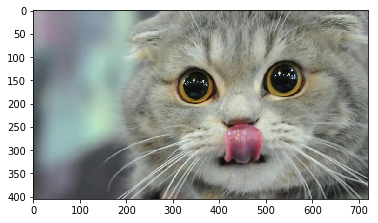

InvalidArgumentError: Expected begin[0] in [0, 405], but got 449
	 [[Node: central_crop/Slice = Slice[Index=DT_INT32, T=DT_UINT8, _device="/job:localhost/replica:0/task:0/device:CPU:0"](DecodeJpeg, central_crop/stack, central_crop/stack_1)]]

Caused by op 'central_crop/Slice', defined at:
  File "/Users/zuyan/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zuyan/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-71e9ad318028>", line 2, in <module>
    central_cropped = tf.image.central_crop(img_data, 0.5)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/image_ops_impl.py", line 548, in central_crop
    image = array_ops.slice(image, bbox_begin, bbox_size)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 650, in slice
    return gen_array_ops._slice(input_, begin, size, name=name)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 7093, in _slice
    "Slice", input=input, begin=begin, size=size, name=name)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Expected begin[0] in [0, 405], but got 449
	 [[Node: central_crop/Slice = Slice[Index=DT_INT32, T=DT_UINT8, _device="/job:localhost/replica:0/task:0/device:CPU:0"](DecodeJpeg, central_crop/stack, central_crop/stack_1)]]


In [11]:
with tf.Session() as sess:   
    central_cropped = tf.image.central_crop(img_data, 0.5)
    plt.imshow(img_data.eval())
    plt.show()
    plt.imshow(central_cropped.eval())
    plt.show()

#### 6. 翻转图片

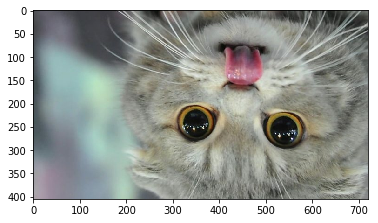

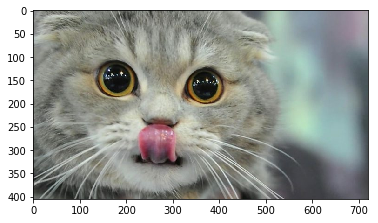

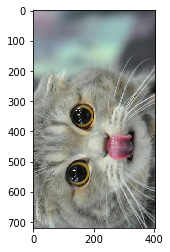

In [12]:
with tf.Session() as sess: 
    # 上下翻转
    flipped1 = tf.image.flip_up_down(img_data)
    plt.imshow(flipped1.eval())
    plt.show()
    # 左右翻转
    flipped2 = tf.image.flip_left_right(img_data)
    plt.imshow(flipped2.eval())
    plt.show()
    
    #对角线翻转
    transposed = tf.image.transpose_image(img_data)

    plt.imshow(transposed.eval())
    plt.show()
    
    # 以一定概率上下翻转图片。
    #flipped = tf.image.random_flip_up_down(img_data)
    # 以一定概率左右翻转图片。
    #flipped = tf.image.random_flip_left_right(img_data)

#### 7. 图片色彩调整

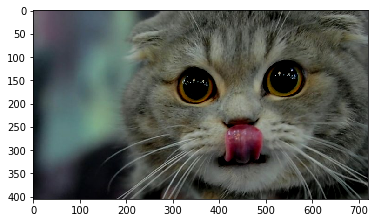

In [13]:
with tf.Session() as sess:     
    # 将图片的亮度-0.5。
    #adjusted = tf.image.adjust_brightness(img_data, -0.5)
    
    # 将图片的亮度-0.5
    #adjusted = tf.image.adjust_brightness(img_data, 0.5)
    
    # 在[-max_delta, max_delta)的范围随机调整图片的亮度。
    adjusted = tf.image.random_brightness(img_data, max_delta=0.5)
    
    # 将图片的对比度-5
    #adjusted = tf.image.adjust_contrast(img_data, -5)
    
    # 将图片的对比度+5
    #adjusted = tf.image.adjust_contrast(img_data, 5)
    
    # 在[lower, upper]的范围随机调整图的对比度。
    #adjusted = tf.image.random_contrast(img_data, lower, upper)

    plt.imshow(adjusted.eval())
    plt.show()

#### 8. 添加色相和饱和度

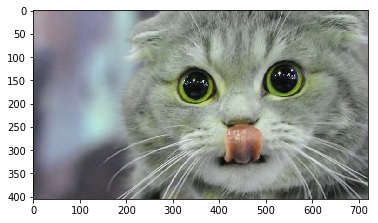

In [14]:
with tf.Session() as sess:         
    adjusted = tf.image.adjust_hue(img_data, 0.1)
    #adjusted = tf.image.adjust_hue(img_data, 0.3)
    #adjusted = tf.image.adjust_hue(img_data, 0.6)
    #adjusted = tf.image.adjust_hue(img_data, 0.9)
    
    # 在[-max_delta, max_delta]的范围随机调整图片的色相。max_delta的取值在[0, 0.5]之间。
    #adjusted = tf.image.random_hue(image, max_delta)
    
    # 将图片的饱和度-5。
    #adjusted = tf.image.adjust_saturation(img_data, -5)
    # 将图片的饱和度+5。
    #adjusted = tf.image.adjust_saturation(img_data, 5)
    # 在[lower, upper]的范围随机调整图的饱和度。
    #adjusted = tf.image.random_saturation(img_data, lower, upper)
    
    # 将代表一张图片的三维矩阵中的数字均值变为0，方差变为1。
    #adjusted = tf.image.per_image_whitening(img_data)
    
    plt.imshow(adjusted.eval())
    plt.show()

#### 9. 添加标注框并裁减。

In [15]:
with tf.Session() as sess:         

    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])

    begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
        tf.shape(img_data), bounding_boxes=boxes)


    batched = tf.expand_dims(tf.image.convert_image_dtype(img_data, tf.float32), 0) 
    image_with_box = tf.image.draw_bounding_boxes(batched, bbox_for_draw)
    
    distorted_image = tf.slice(img_data, begin, size)
    plt.imshow(distorted_image.eval())
    plt.show()

InvalidArgumentError: Expected size[0] in [0, 321], but got 1687
	 [[Node: Slice = Slice[Index=DT_INT32, T=DT_UINT8, _device="/job:localhost/replica:0/task:0/device:CPU:0"](DecodeJpeg, sample_distorted_bounding_box/SampleDistortedBoundingBoxV2, sample_distorted_bounding_box/SampleDistortedBoundingBoxV2:1)]]

Caused by op 'Slice', defined at:
  File "/Users/zuyan/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zuyan/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-0eb0d305a4cb>", line 12, in <module>
    distorted_image = tf.slice(img_data, begin, size)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 650, in slice
    return gen_array_ops._slice(input_, begin, size, name=name)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 7093, in _slice
    "Slice", input=input, begin=begin, size=size, name=name)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/Users/zuyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Expected size[0] in [0, 321], but got 1687
	 [[Node: Slice = Slice[Index=DT_INT32, T=DT_UINT8, _device="/job:localhost/replica:0/task:0/device:CPU:0"](DecodeJpeg, sample_distorted_bounding_box/SampleDistortedBoundingBoxV2, sample_distorted_bounding_box/SampleDistortedBoundingBoxV2:1)]]
